## Big Mart Sales - AV Hackathon
#### This is online hackthon problem in which we will determine the sales of the different items of the of the big mart based on the given feature and their effects on the target variable
<br>
**We'll follow a 5 step approach to solve this problem**
- 1. Exploratory Data Analysis
- 2. Data Cleaning
- 3. Feature Engineering
- 4. Algorithm Selection
- 5. Model Training

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scipy
from scipy.stats import norm
from scipy import stats

# plot style
sns.set_style('darkgrid')

# hiding warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Step 1
### Exploratory Data Analysis (EDA)

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [5]:
# knowing the statistical vakues of the data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- Item_Visibility has a min value of zero, as this cannot be possible. Since the item is present in the store and is bought, visibility cannot be 0.
- Outlet_Establishment_Years vary from 1985 to 2009. Since it has numerical values but represent categorical, so we'll convert the values in some other meaningful form

In [6]:
# checking the null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# datatypes of the features
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# checking the number of u
train.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

- There are only 1559 unique products and 10 unique stores

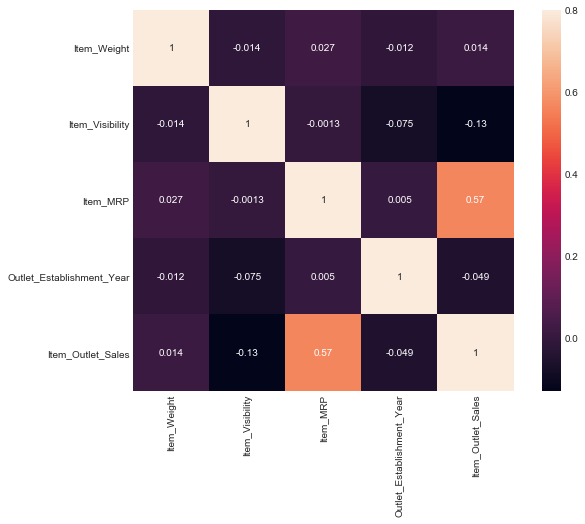

In [9]:
plt.figure(figsize=(10,7))

# let's find the correlation between the features
cor = train.corr()
sns.heatmap(cor, vmax=0.8, square=True, annot=True)

- There's only one significant correlation is found between the Inter_Outlet_Sales and Item_Price
- 0.57 is the correlation value and hence is very useful

In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


[]

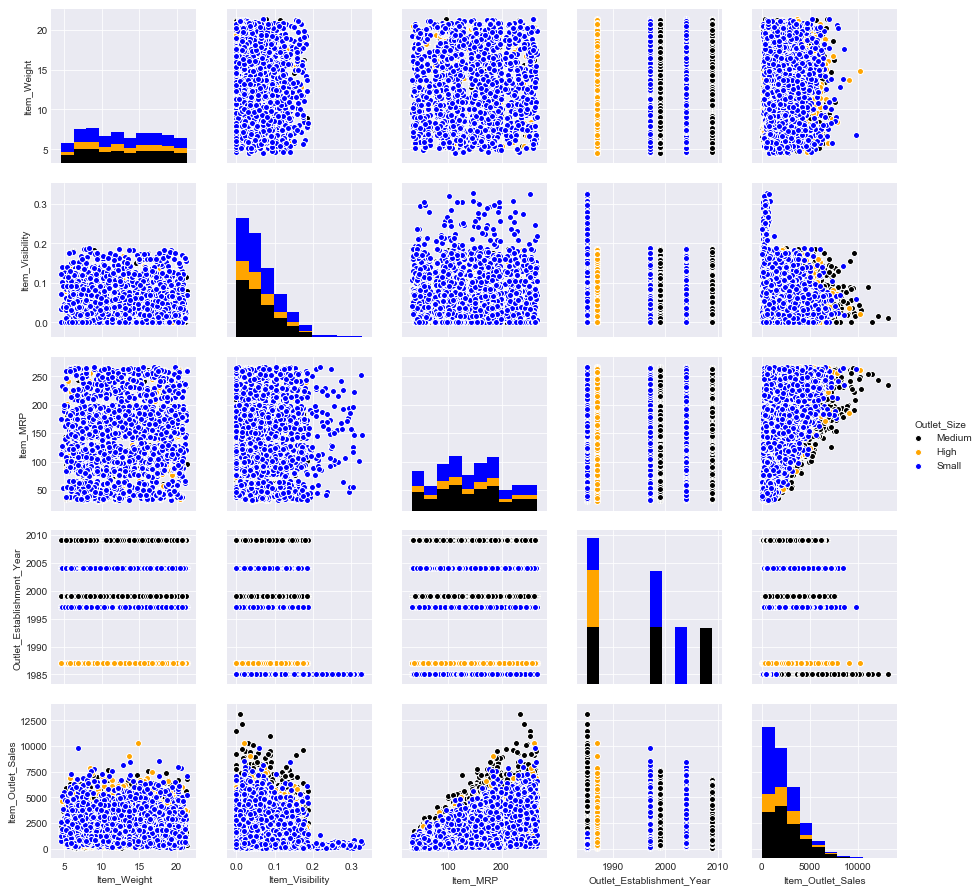

In [11]:
# scatter plot matrix
sns.pairplot(train, hue='Outlet_Size', palette=['black', 'orange', 'blue'])
plt.plot()

- Item Weight for the Grocery store accounts for less weighted products and also have less sales 
- Sales increase with the type of market, the product is sold from
- The visibility of grocery products(Grocery store) is higher as compared to other supermarkets

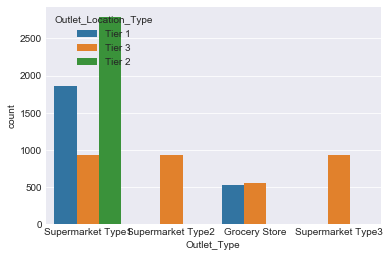

In [12]:
# checking the counts of the outlets store with respect to their location
sns.countplot(data=train, x=train.Outlet_Type, hue=train.Outlet_Location_Type)

- clearly, Supermarket type 1 dominates the other ones
- supermarket 1 comprises all the tier2 location and is majorly present at tier1 location

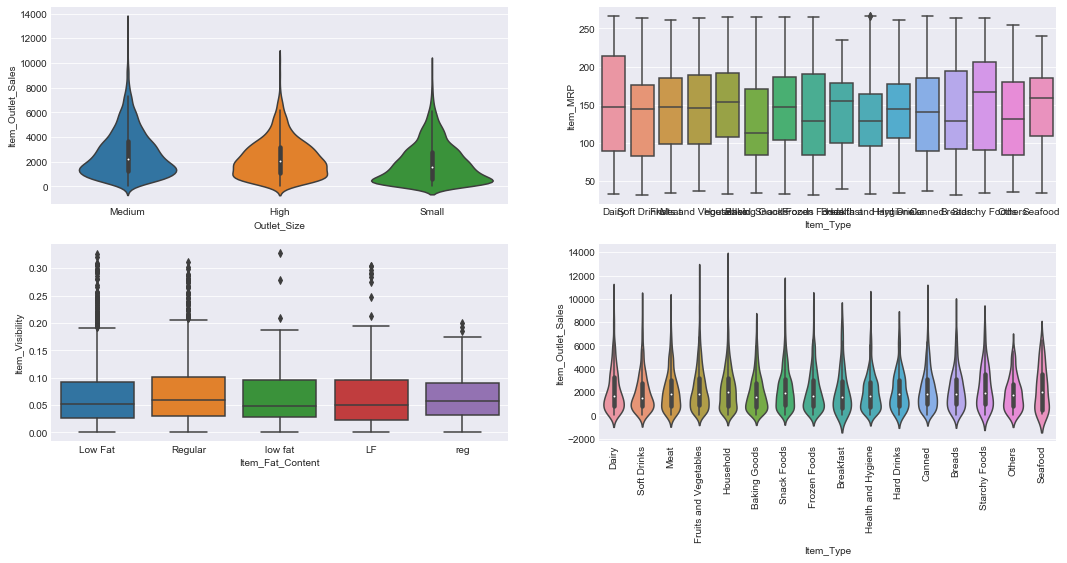

In [13]:
# creating subplots for some features
f,ax=plt.subplots(2,2,figsize=(18,8))

# rotating x-axis names
plt.xticks(rotation=75)

# Outlet Size vs Item Outlet Sales with respect to Location of outlets
sns.violinplot(data=train, x=train.Outlet_Size, y=train.Item_Outlet_Sales, ax=ax[0,0])

# Item type vs Item Outlet Sales
sns.violinplot(data=train, x=train.Item_Type, y=train.Item_Outlet_Sales, ax=ax[1,1])

plt.xticks(rotation=90)
# Item MRP vs Item Type
sns.boxplot(data=train, x=train.Item_Type, y=train.Item_MRP, ax=ax[0,1])

# Item MRP vs Item Type
sns.boxplot(data=train, x=train.Item_Fat_Content, y=train.Item_Visibility, ax=ax[1,0])


**Left Top**
- As expected small outlet size corresponds to small sales as compared to others
- Long stretched line of the medium explains the presence of outliers
<br><br>
**Right Top**
- There's not much of difference in the various categories of the food type and thier affect on the outlet sales
<br><br>
**Left Bottom**
- Fat content doesn't relate to the visibilty of the products
- Also there are considerable amount of outliers present
<br><br>
**Right Bottom**
- The type of item is also very similar along side the product sales
- There are outliers present depicted by the stretched lines


### Step 2
### Data Cleaning

In [14]:
# saving the item indentifier and the outlet identifier
Item_Id = test.Item_Identifier
Outlet_Id = test.Outlet_Identifier

In [15]:
# seperating the target variable
y_train = train.Item_Outlet_Sales.values
train.drop('Item_Outlet_Sales', 1, inplace=True)

In [16]:
# combining the train and test data
data = train.append(test)

In [17]:
print(train.shape)
print(test.shape)
data.shape

(8523, 11)
(5681, 11)


(14204, 11)

In [18]:
y_train.shape

(8523,)

- Item MRP


 mu = 140.99 and sigma = 62.27



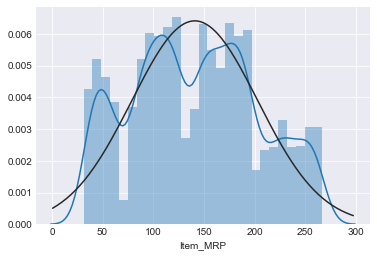

In [19]:
sns.distplot(train.Item_MRP, fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train.Item_MRP)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

- This depict a normal distribution with a little variance and hence, there is no need of transformation

#### Missing values

In [20]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

- Item MRP

In [21]:
data.reset_index(inplace=True)

In [22]:
data.drop('index',axis=1,inplace=True)

In [23]:
data.Item_Weight = data.groupby('Outlet_Type')['Item_Weight'].apply(lambda x : x.fillna(x.mean()))

In [24]:
print(train.shape)
print(test.shape)
print(data.shape)
print(y_train.shape)

(8523, 11)
(5681, 11)
(14204, 11)
(8523,)


In [25]:
data.Item_Weight.isnull().sum()

1559

In [26]:
# filling the null values with the mean value
data.Item_Weight.fillna(0, inplace=True)

In [27]:
# checking the null replacement
data.Item_Weight.isnull().sum()

0

- Outlet Size

In [28]:
data.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [29]:
# we impute the missing values by creating the none category
data.Outlet_Size.replace(np.nan, 'None', inplace=True)

In [30]:
# checking null remaining
data.Outlet_Size.isnull().sum()

0

### Step 3
### Feature Engineering

In [31]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [32]:
print(train.shape)
print(test.shape)
print(data.shape)

(8523, 11)
(5681, 11)
(14204, 11)


- Outlet Establishment year

In [33]:
# here we have the year of the outlet foundation
# so we'll convert it to the amount of years since their opening
# that might provide more relevant data

data.Outlet_Establishment_Year = [2018 - s for s in data.Outlet_Establishment_Year]

In [34]:
type(data.Outlet_Establishment_Year)

pandas.core.series.Series

- Item Visibilty

In [35]:
# visibilty in practical can't be zero, hence we replace the 0 values with the average ones
data.Item_Visibility.replace(0, data.Item_Visibility.mean(), inplace=True)

- Fat Content

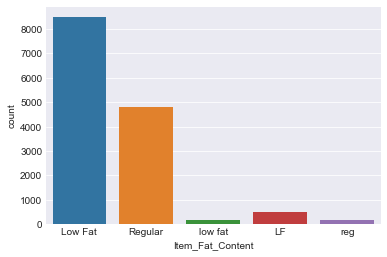

In [36]:
sns.countplot(x='Item_Fat_Content', data=data)

- There are unnecessary classes that are been shown 
- Majorly there are only two classes:- Low Fat and Regular
- We merge all the classes into the two basic classes

In [37]:
fat = {"Item_Fat_Content" : {"low fat" : "Low Fat", "LF" : "Low Fat", "reg":"Regular"}}
data.replace(fat,inplace=True)

data.Item_Fat_Content.value_counts(dropna=False)

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

- Item Type

In [38]:
data.Item_Type.value_counts(dropna=False)

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

- We'll try to compress the classes based on their similar properties

In [39]:
variety = {"Item_Type" : {"Fruits and Vegetables":"Breads", 'Household':'Breads', 'Dairy':'Breads', 
                           'Baking Goods':'Breads', 'Health and Hygiene':'Breads', 'Breakfast':'Breads',
                           'Soft Drinks':'Others','Canned':'Others', 'Hard Drinks':'Others', 'Frozen Foods':'Meat', 
                           'Starchy Foods':'Meat', 'Seafood':'Meat'}}

In [40]:
data.replace(variety, inplace=True)

In [41]:
data.Item_Type.value_counts()

Breads         7243
Meat           2520
Others         2452
Snack Foods    1989
Name: Item_Type, dtype: int64

**Label Encoding**

In [42]:
features = ['Item_Identifier','Item_Fat_Content',
            'Item_Type','Outlet_Identifier','Outlet_Size',
            'Outlet_Location_Type','Outlet_Type']

In [43]:
###  importing the label encoder from sklearn 
from sklearn.preprocessing import LabelEncoder

for s in features:
    label = LabelEncoder()
    label.fit(list(data[s].values))
    data[s] = label.transform(list(data[s].values))

In [44]:
data.shape

(14204, 11)

#### Getting dummies of the data

In [45]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type',
                                     'Outlet_Size','Outlet_Type','Item_Type'])


In [46]:
data.shape

(14204, 23)

In [47]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_Size_2,Outlet_Size_3,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3
0,156,9.30,0.016047,249.8092,9,19,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,8,5.92,0.019278,48.2692,3,9,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,662,17.50,0.016760,141.6180,9,19,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,1121,19.20,0.065953,182.0950,0,20,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,1297,8.93,0.065953,53.8614,1,31,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [48]:
# creating a new feature 
data['Item_Weight_MRP'] = data.Item_MRP * data.Item_Weight

In [49]:
print(train.shape)
print(test.shape)
print(data.shape)
print(y_train.shape)

(8523, 11)
(5681, 11)
(14204, 24)
(8523,)


In [50]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Item_Fat_Content_0           0
Item_Fat_Content_1           0
Outlet_Location_Type_0       0
Outlet_Location_Type_1       0
Outlet_Location_Type_2       0
Outlet_Size_0                0
Outlet_Size_1                0
Outlet_Size_2                0
Outlet_Size_3                0
Outlet_Type_0                0
Outlet_Type_1                0
Outlet_Type_2                0
Outlet_Type_3                0
Item_Type_0                  0
Item_Type_1                  0
Item_Type_2                  0
Item_Type_3                  0
Item_Weight_MRP              0
dtype: int64

In [51]:
# seperating the train and the test data
n_train = train.shape[0]
n_test = test.shape[0]

train = data[:n_train]
test = data[n_train:]

# making the target
target = y_train

In [52]:
print(train.shape)
print(test.shape)
print(y_train.shape)

(8523, 24)
(5681, 24)
(8523,)


In [53]:
# performing train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=.15, random_state=3)

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7244, 24)
(7244,)
(1279, 24)
(1279,)


 ### Step 4 
 ### Algorithm Selection and Model Training

**Importing the algorithms**

In [55]:
# importing the models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Using Kfold and Cross val score**

In [56]:
# creating a function that will the return the corresponding RMSE
def cross(model):
    kf = KFold(n_splits=7, shuffle=True, random_state=1).get_n_splits(train.values)
    model_scores = - cross_val_score(model, X_train, y_train, cv=kf, scoring = 'neg_mean_squared_error')
    model_rmse = np.sqrt(model_scores).mean()
    return model_rmse

In [57]:
# Linear Regression
reg = LinearRegression(normalize=True)

In [58]:
# DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)

In [59]:
# RandomForestRegressor
forest = RandomForestRegressor(max_depth=4, n_estimators=150, n_jobs=5)

In [60]:
# GradientBoostingRegressor
# model A
boost = GradientBoostingRegressor(max_depth=3, learning_rate=0.05)

In [61]:
# Lasso
laso = Lasso(alpha=0.0005, random_state=3)

In [62]:
# Kernel Ridge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

 - Lets check the RMSE of our trained models

In [63]:
reg_rmse = cross(reg)
print('Linear Regression:-', "%.2f" %reg_rmse)

Linear Regression:- 1129.52


In [64]:
tree_rmse = cross(tree)
print('Decison Tree:-', "%.2f" %tree_rmse)

Decison Tree:- 1103.93


In [65]:
forest_rmse = cross(forest)
print('Random Forest:-', "%.2f" %forest_rmse)

Random Forest:- 1103.73


In [66]:
boost_rmse = cross(boost)
print("Gradient Boosting (model A):-", "%.2f" %boost_rmse)

Gradient Boosting (model A):- 1092.07


In [67]:
laso_rmse = cross(laso)
print('Lasso:-', "%.2f" %laso_rmse)

Lasso:- 1129.52


In [68]:
KRR_rmse = cross(KRR)
print('Kernel Ridge Regression', '%.2f' %KRR_rmse)

Kernel Ridge Regression 1092.75


#### Here we'll use the concept of model stacking
- It means that we'll stack the predictions of all our base model into a new model
- The latter model will be considered as the first level of stacking

In [69]:
# importing the libraries
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error

In [70]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


- Now we'll pass our base models into the Averaging model class

In [71]:
averaged_models = AveragingModels(models = (reg, boost, KRR, laso, tree, forest))

score = cross(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 1091.4342 (0.0000)



#### Final Training and Predictions

In [72]:
# fitting the model
averaged_models.fit(train.values, target)

# finding the trainig data predictions
train_pred = averaged_models.predict(train.values)

print('The training RMSE is :-')
print(np.sqrt(mean_squared_error(target, train_pred)))

The training RMSE is :-
1069.649417499871


In [73]:
# making test predictions
pred = averaged_models.predict(test.values)

- Sumbitting the predictions

In [75]:
sub = pd.DataFrame()
sub['Item_Identifier'] = Item_Id
sub['Outlet_Identifier'] = Outlet_Id
sub['Item_Outlet_Sales'] = pred
sub.to_csv('sales.csv',index=False)

 ### Hence , we complete this hackathon problem
 - The file will be now be submitted to the AV hackathon contest
 - Thanks for going thorugh the notebook....hope you have find it useful!!